# EDA: Airline Delay
<img src="../assets/airline-pic.jpg" alt="Title-Pic">

# Imports

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas import Series, DataFrame


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (12, 7), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

# Data

In [66]:
df = pd.read_csv("../data/Airlines.csv")
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [67]:
df["Target"] = df["Delay"]
df["Delay"] = df["Delay"].map({0: "False", 1: "True"}).astype("category")

# Helper Functions & Constants

In [68]:
ID = "id"
AIRLINE = "Airline"
FLIGHT = "Flight"
AIRPORT_FROM = "AirportFrom"
AIRPORT_TO = "AirportTo"
DAY_OF_WEEK = "DayOfWeek"
TIME = "Time"
LENGTH = "Length"
DELAY = "Delay"

TARGET = "Target"

In [69]:
def plot_target_relation(column_name):
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax1, ax2 = axes
    
    target_pvt = df.pivot_table(index=column_name, values=TARGET, aggfunc="mean").sort_index()

    sns.pointplot(x=DELAY, y=column_name, data=df, ax=ax1, order=["False", "True"]).set_title(f"Relation Delay and {column_name}")
    sns.regplot(x=target_pvt.index, y=target_pvt.to_numpy(), ci=False, line_kws={"color": "C1"}, scatter_kws={"alpha": 0.5}, ax=ax2).set_title(f"Linear Relation Delay and {column_name}")

def plot_target_relation_cat(column_name):
    g = sns.pointplot(x=column_name, y=TARGET, data=df)
    g.set_title(f"Relation Delay-Mean and {column_name}")
    g.tick_params(axis='x', rotation=45)

def plot_dist(column_name):
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax1, ax2 = axes
    
    title = f"Distribution of {column_name}"
    ax1.set_title(title)
    ax2.set_title(title)

    sns.boxplot(x=column_name, data=df, ax=ax1)
    df[column_name].hist(ax=ax2)

    print(f"Skew: \t {df[column_name].skew()}")

def plot_dist_cat(column_name):
    g = sns.countplot(x=column_name, data=df, color="C0")
    g.tick_params(axis='x', rotation=45)
    g.set_title(f"Distribution of {column_name}")

# Exploring the data

## General Overview

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id           539383 non-null  int64   
 1   Airline      539383 non-null  object  
 2   Flight       539383 non-null  int64   
 3   AirportFrom  539383 non-null  object  
 4   AirportTo    539383 non-null  object  
 5   DayOfWeek    539383 non-null  int64   
 6   Time         539383 non-null  int64   
 7   Length       539383 non-null  int64   
 8   Delay        539383 non-null  category
 9   Target       539383 non-null  int64   
dtypes: category(1), int64(6), object(3)
memory usage: 37.6+ MB


In [71]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Target
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [72]:
df.describe(include=["O"])

,Airline,AirportFrom,AirportTo
count,539383,539383,539383
unique,18,293,293
top,WN,ATL,ATL
freq,94097,34449,34440


In [73]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
Target         0
dtype: int64

## Target

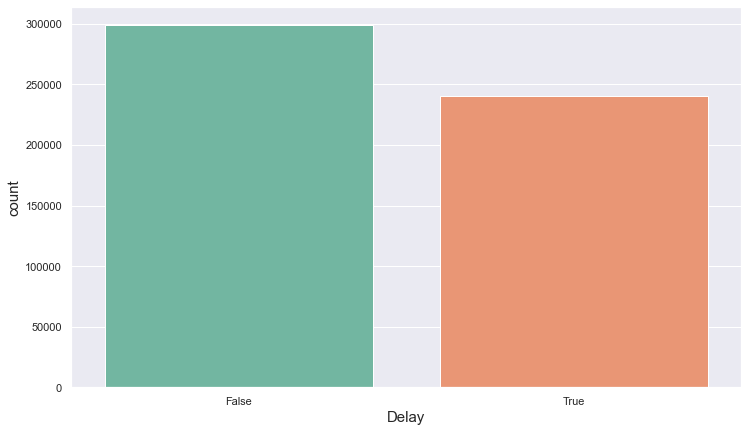

In [74]:
df[DELAY].value_counts()
sns.countplot(x=DELAY, data=df);

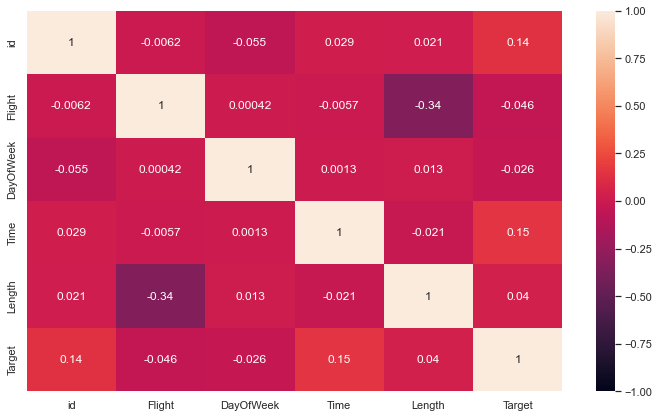

In [75]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1);

## Airline

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

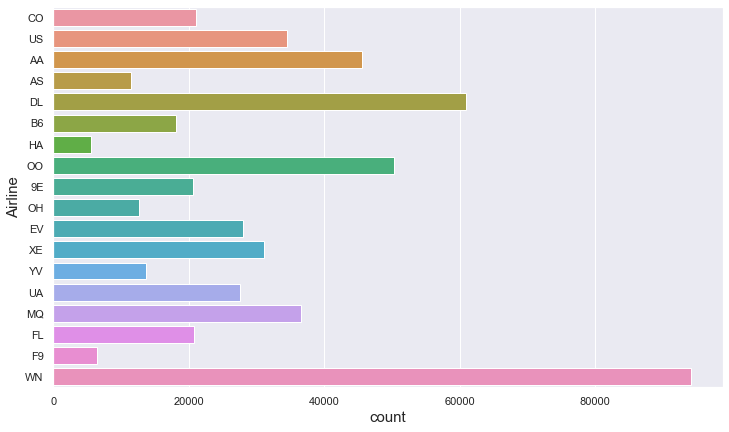

In [76]:
sns.countplot(y=AIRLINE, data=df);
df[AIRLINE].value_counts()

-> One-Hot-Encoding

,Target
Airline,
WN,0.697759
CO,0.566199
B6,0.467038
OO,0.452899
DL,0.450476
F9,0.449040
EV,0.402208
9E,0.397660
AA,0.388470


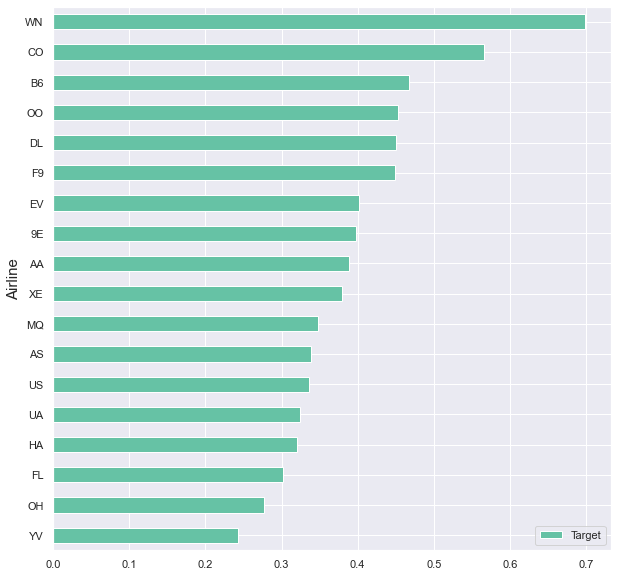

In [78]:
df_delay_by_airline = df.pivot_table(index=AIRLINE, values=TARGET, aggfunc="mean").sort_values(by=TARGET, ascending=True)
df_delay_by_airline.plot.barh(figsize=(10, 10))
df_delay_by_airline.sort_values(by=TARGET, ascending=False)

## Flight

In [ ]:
df[FLIGHT].describe()

count    539383.000000
mean       2427.928630
std        2067.429837
min           1.000000
25%         712.000000
50%        1809.000000
75%        3745.000000
max        7814.000000
Name: Flight, dtype: float64

In [ ]:
df[FLIGHT].nunique()

6585

In [ ]:
df[FLIGHT].value_counts()

16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: Flight, Length: 6585, dtype: int64

,Target
Flight,
"(277.999, 310.0]",0.456917
"(310.0, 337.0]",0.465758
"(337.0, 366.0]",0.447930
"(366.0, 394.0]",0.476993
"(394.0, 424.0]",0.483284
...,...
"(6640.0, 6736.0]",0.388454
"(6736.0, 6892.0]",0.424852
"(6892.0, 7035.0]",0.445656


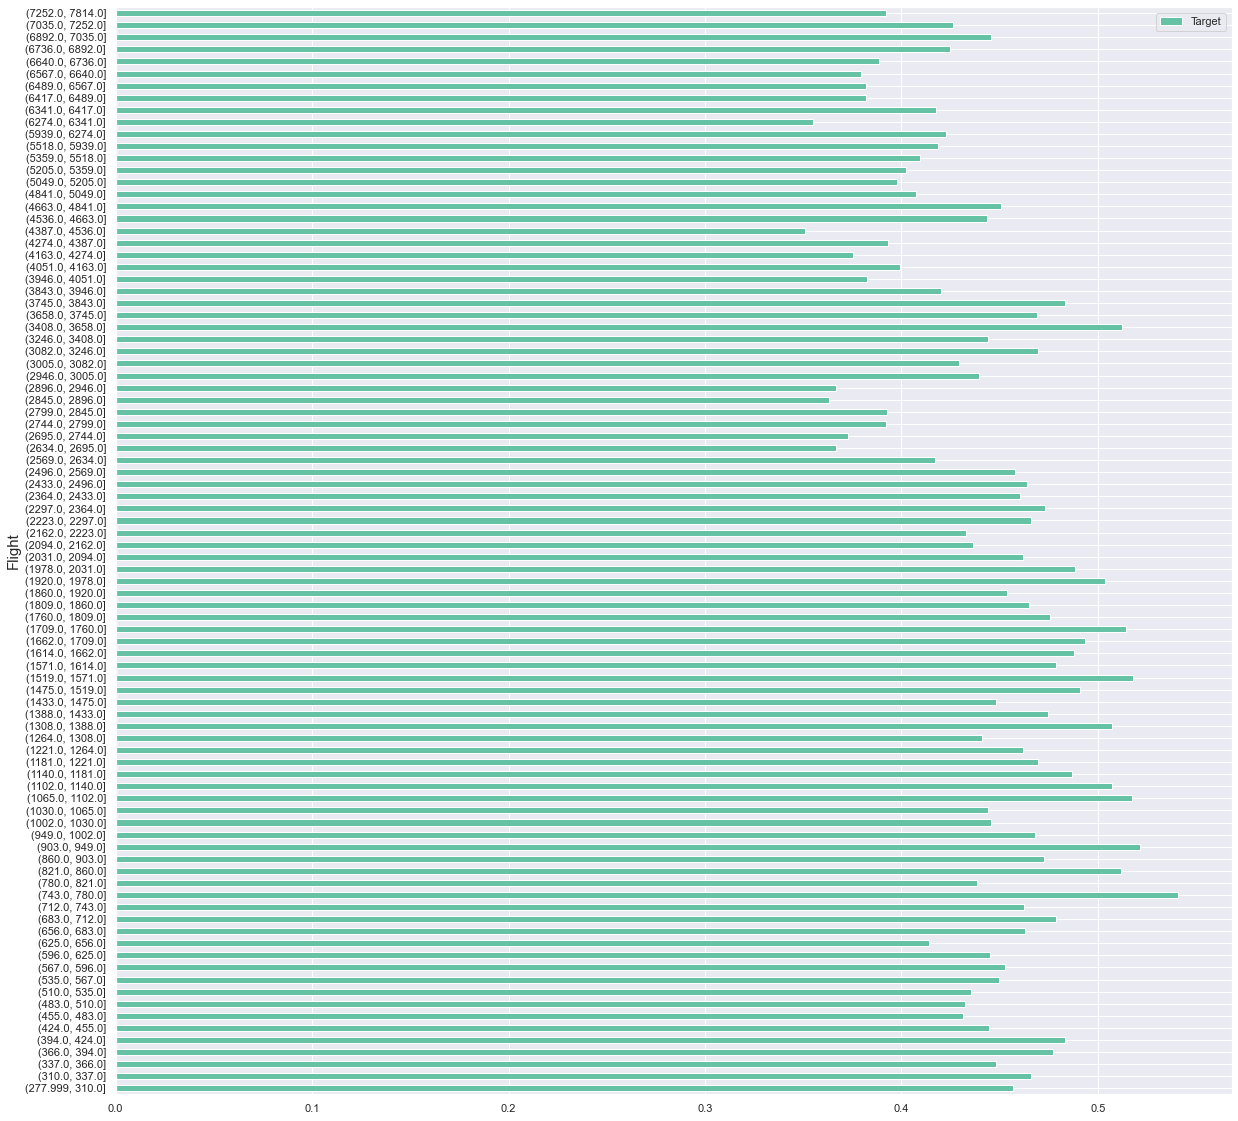

In [81]:
df_test_binning = df.copy()
df_test_binning[FLIGHT] = pd.qcut(df[FLIGHT], q=np.arange(0.1, 1.01, 0.01))

pvt = df_test_binning.pivot_table(index=FLIGHT, values=TARGET, aggfunc="mean")
pvt.plot.barh(figsize=(20, 20));
pvt.sort_index()

The type of the plane has no affect on the delay of an plane. -> Drop
(vielleicht Wartung?)

## Airport From|To

,Target
AirportFrom,
ABE,0.321637
ABI,0.151659
ABQ,0.491247
ABR,0.500000
ABY,0.252874
...,...
VPS,0.331754
WRG,0.305085
XNA,0.281028


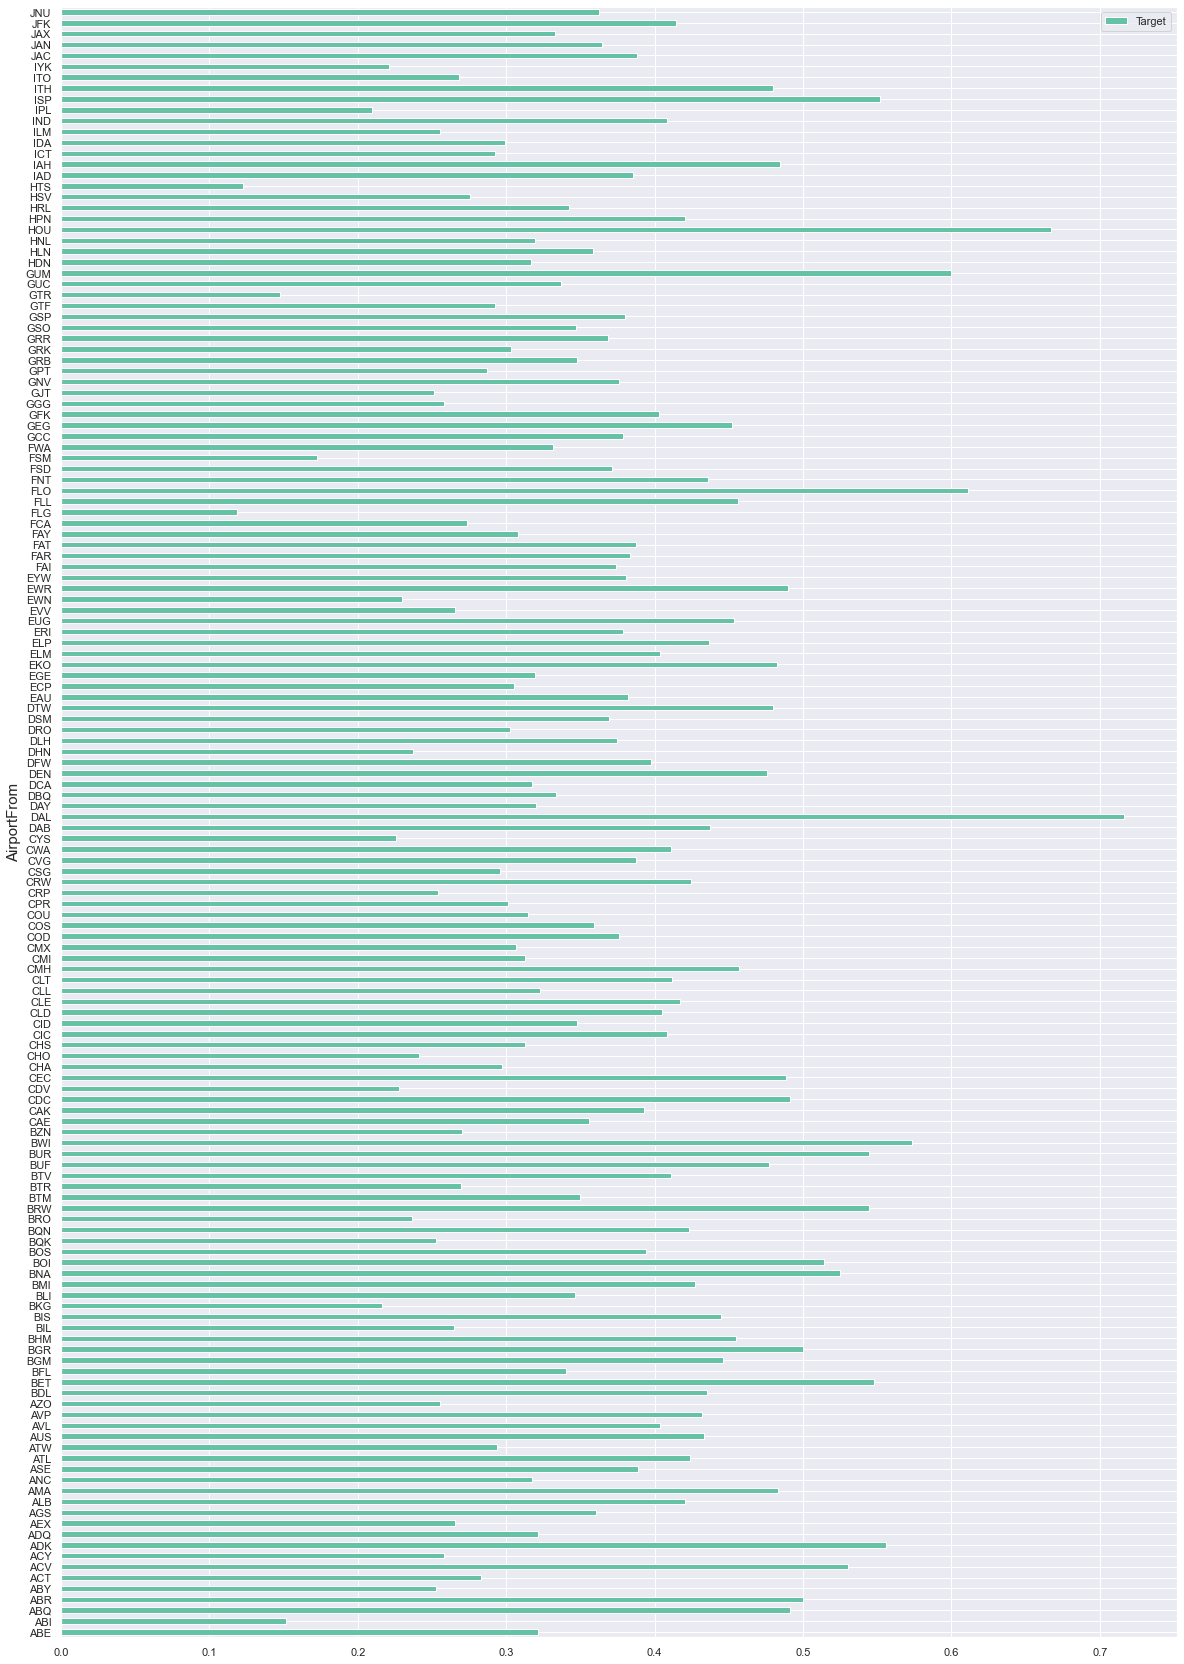

In [84]:
pvt = df.pivot_table(index=AIRPORT_FROM, values=TARGET, aggfunc="mean")

pvt.iloc[:150].plot.barh(figsize=(20, 30));
pvt

In [ ]:
from_airports = df.pivot_table(index=AIRPORT_FROM, values=DELAY, aggfunc="mean").sort_index()
to_airports = df.pivot_table(index=AIRPORT_TO, values=DELAY, aggfunc="mean").sort_index()

np.isin(from_airports.index, to_airports.index).mean() == 1
# Same Airports

True

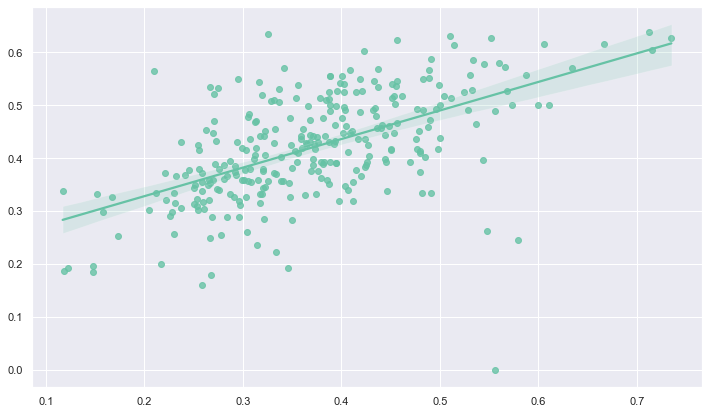

In [ ]:
sns.regplot(x=from_airports.to_numpy()[:, 0], y=to_airports.to_numpy()[:, 0]);

In [ ]:
np.corrcoef(from_airports.to_numpy()[:, 0], to_airports.to_numpy()[:, 0])

array([[1.        , 0.57305877],
       [0.57305877, 1.        ]])

## Day Of Week

In [ ]:
df[DAY_OF_WEEK].value_counts().sort_index()

1    72769
2    71340
3    89746
4    91445
5    85248
6    58956
7    69879
Name: DayOfWeek, dtype: int64

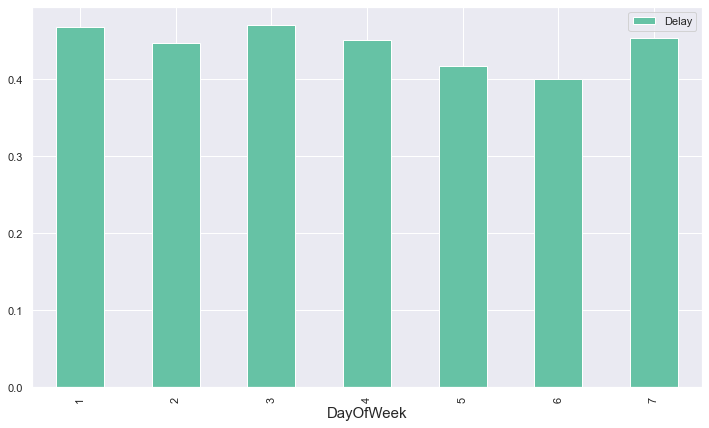

In [ ]:
df.pivot_table(index=DAY_OF_WEEK, values=DELAY, aggfunc="mean").plot.bar();

## Time

In [ ]:
df[TIME].nunique()

1131

In [ ]:
df[df[TIME] <=0].shape[0]

0

0.07638460995183365

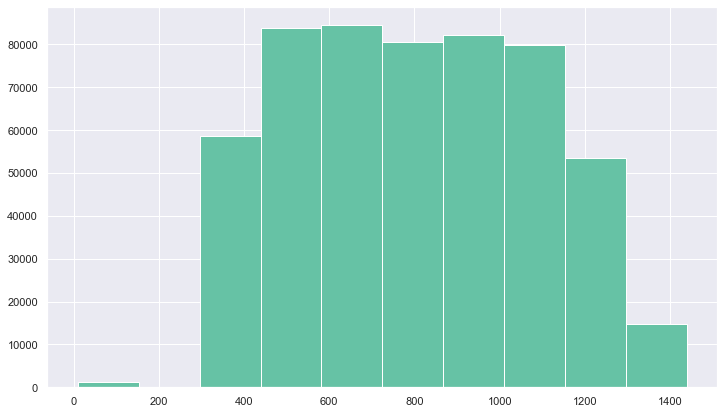

In [ ]:
df[TIME].hist();
df[TIME].skew()

## Length

In [ ]:
df[LENGTH].nunique()

426

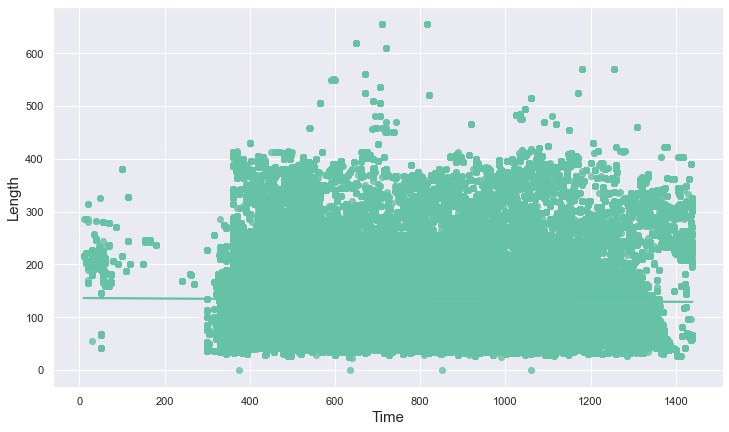

In [ ]:
sns.regplot(x=TIME, y=LENGTH, data=df);

1.493904526568353

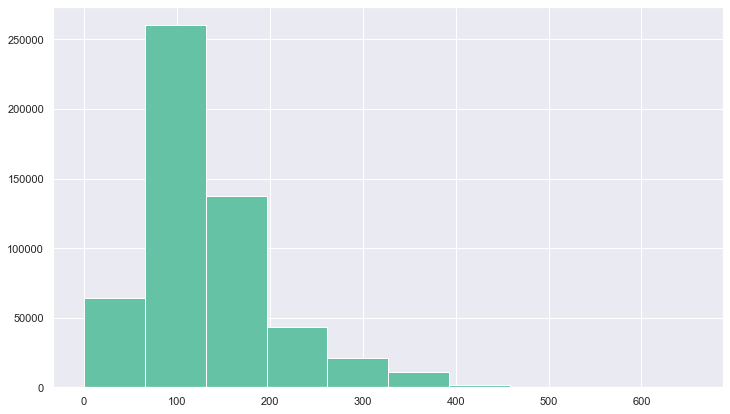

In [ ]:
df[LENGTH].hist();
df[LENGTH].skew()

In [ ]:
df[df[LENGTH] <=5]

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
179149,179150,F9,106,DEN,MSP,6,635,0,0
182840,182841,F9,107,MSP,DEN,6,851,0,0
188953,188954,F9,103,MSP,DEN,7,375,0,0
445578,445579,B6,493,BOS,SEA,7,1060,0,1


In [ ]:
df[LENGTH].sort_values().head(10)

188953     0
445578     0
179149     0
182840     0
73160     23
23443     24
58807     24
126024    24
5678      24
41512     24
Name: Length, dtype: int64

In [ ]:
df[LENGTH].mean()

132.20200673732765

In [ ]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


# Conclusion

#### Drop

- id
- Flight

#### OHE

- Airline
- AirportFrom
- AirportTo
- DayOfWeek

#### LogTransformation

- Length

#### Scale

- Length
- Time

#### Interpolation

- Length with mean at 0-Value